In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_excel('Senior_Insights_Officer_Interview_Task_2023.xlsx', sheet_name='Total')

In [3]:
df

,Dog name,Rehoming Centre,Dog breed,Days in care,Dog DOB,Month
0,Sheba,Evesham,Collie (Rough),42,2006-01-01,2023-01-01
1,Rusty,Kenilworth,Terrier (Jack Russell),120,2007-01-01,2023-01-01
2,Teddy,Evesham,Collie (Border),42,2005-02-25,2023-01-01
3,Hollie,Ballymena,Crossbreed,468,2011-07-01,2023-01-01
4,Shep,Shrewsbury,Collie Cross (Border),18,2010-08-24,2023-01-01
...,...,...,...,...,...,...
10333,Elsa,Cardiff,Retriever (Labrador),2,2022-08-01,2023-06-01
10334,Rusty,Salisbury,Poodle (Toy),2,2021-04-09,2023-06-01
10335,Moon,Harefield,Poodle,2,2023-01-12,2023-06-01
10336,Tahlula,Shrewsbury,Chihuahua (Smooth Coat),2,2017-06-02,2023-06-01


In [4]:
df['dog_count'] = 1

In [5]:
df.pivot_table('dog_count', index='Month', aggfunc='sum')

,dog_count
Month,
2023-01-01,1631
2023-02-01,1658
2023-03-01,1717
2023-04-01,1779
2023-05-01,1771
2023-06-01,1782


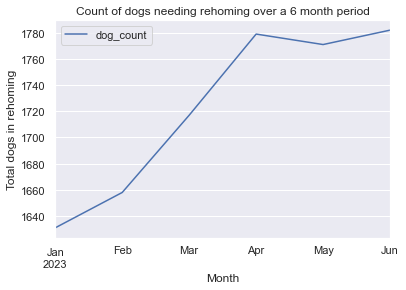

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles
df.pivot_table('dog_count', index='Month', aggfunc='sum').plot()
plt.ylabel('Total dogs in rehoming')
plt.title('Count of dogs needing rehoming over a 6 month period')
plt.savefig('fulldogsneedrehoming.png', dpi=300)

In [8]:
group_month_count = df.groupby('Month')[['dog_count']].sum()
group_month_count['% change'] = group_month_count.pct_change()*100
group_month_count

,dog_count,% change
Month,,
2023-01-01,1631,NaN
2023-02-01,1658,1.655426
2023-03-01,1717,3.558504
2023-04-01,1779,3.610949
2023-05-01,1771,-0.449691
2023-06-01,1782,0.621118


In [9]:
pd.options.display.max_rows = 20
rehoming_centre = df.groupby(['Rehoming Centre','Month'])[['dog_count']].sum()
rehoming_centre['% change'] = rehoming_centre.pct_change()*100
rehoming_centre

dog_count   % change
Rehoming Centre Month                           
Ballymena       2023-01-01         49        NaN
                2023-02-01         49   0.000000
                2023-03-01         41 -16.326531
                2023-04-01         44   7.317073
                2023-05-01         57  29.545455
...                               ...        ...
West Calder     2023-02-01         55  -1.785714
                2023-03-01         55   0.000000
                2023-04-01         56   1.818182
                2023-05-01         67  19.642857
                2023-06-01         62  -7.462687

[132 rows x 2 columns]

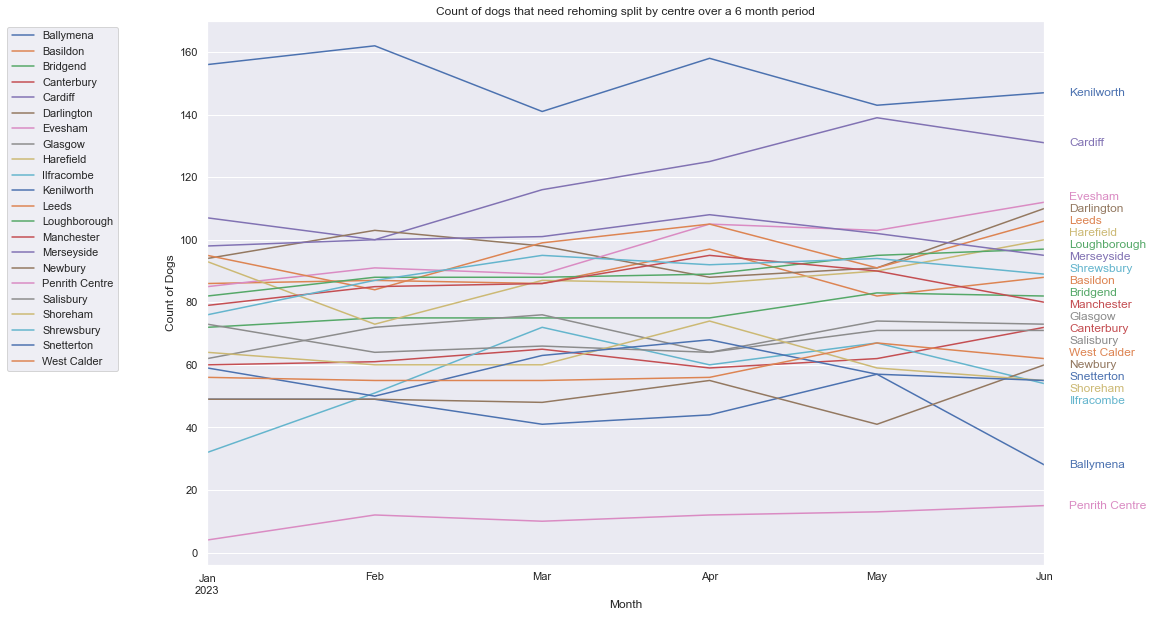

In [10]:
import matplotx

pd.pivot_table(df.reset_index(),
               index='Month', columns='Rehoming Centre', values='dog_count', aggfunc='sum'
              ).plot(figsize=(15,10))
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.))
matplotx.line_labels()
plt.ylabel('Count of Dogs')
plt.title('Count of dogs that need rehoming split by centre over a 6 month period')
plt.savefig('countofdogsthatneedrehomingsplitbycentre.png', dpi=300)

In [11]:
#pd.options.display.max_rows = 4000
breed_assessment = df.groupby(['Dog breed','Month'])[['dog_count']].sum()
breed_assessment['% change'] = breed_assessment.pct_change()*100
breed_assessment

dog_count   % change
Dog breed Month                           
Akita     2023-01-01          9        NaN
          2023-02-01         12  33.333333
          2023-03-01         11  -8.333333
          2023-04-01         12   9.090909
          2023-05-01         14  16.666667
...                         ...        ...
Whippet   2023-02-01          6  20.000000
          2023-03-01          6   0.000000
          2023-04-01          6   0.000000
          2023-05-01          6   0.000000
          2023-06-01          4 -33.333333

[658 rows x 2 columns]

In [12]:
shorehamdf = (df[df['Rehoming Centre'] == 'Shoreham'])

In [13]:
shorehamdf = shorehamdf.replace(['Chihuahua (Smooth Coat)','Chihuahua (Long Coat)'],'Chihuahua (Smooth and Long Coat)')

In [14]:
junedf = shorehamdf[shorehamdf['Month']=='2023-06-01']

In [15]:
pd.options.display.max_rows = 140
junedf.groupby(['Dog breed','Month'])[['dog_count']].sum()

# / junedf.groupby('Dog breed')['dog_count'].transform('sum')

#pd.pivot_table(shorehamdf.reset_index(),
#               index='Month', columns='Dog breed', values='dog_count', aggfunc='sum'
#              ).plot(figsize=(15,10))
#plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1.))
#matplotx.line_labels()
#plt.ylabel('Count of Dogs')
#plt.title('Count of dogs that need rehoming split by centre over a 6 month period')
#plt.savefig('countofdogsthatneedrehomingsplitbycentre.png', dpi=300)

,,dog_count
Dog breed,Month,
American Bulldog,2023-06-01,1
Beagle,2023-06-01,2
Bichon Frise,2023-06-01,1
Borzoi,2023-06-01,1
Bulldog,2023-06-01,1
Chihuahua (Smooth and Long Coat),2023-06-01,4
Collie (Border),2023-06-01,6
Crossbreed,2023-06-01,9
Dalmatian,2023-06-01,1


In [16]:
pd.pivot_table(data=junedf, index='Dog breed',
               values='dog_count',
               aggfunc=sum,
               fill_value=0).apply(lambda x: x*100/sum(x))

,dog_count
Dog breed,
American Bulldog,1.818182
Beagle,3.636364
Bichon Frise,1.818182
Borzoi,1.818182
Bulldog,1.818182
Chihuahua (Smooth and Long Coat),7.272727
Collie (Border),10.909091
Crossbreed,16.363636
Dalmatian,1.818182
